In [4]:
import requests
import json
import csv
import ast 
import pandas as pd
import numpy as np

#find all movie ids for year 2019
#year = 2019

for year in range(2009, 1999, -1):
    print("starting id collecting : " + str(year))
    urlcomp = 'https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=' + str(year) + '-01-01&primary_release_date.lte=' + str(year) + '-12-31'
    print(urlcomp)
    #urlcomp = 'https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&year=' + str(year)
    headers = {'authorization': "Basic API Key Ommitted", 'accept': "application/json", 'accept': "text/csv"}

    rcomp = requests.get(urlcomp, headers=headers)

    # Get JSON Data
    data = rcomp.json()

    #print ("Total Pages :", str(data['total_pages']))

    f = open('allmovieidsfrom'+str(year)+'.csv', "w")

    for p in range(data['total_pages']):
    #for p in range(400, 500):
        urlcomp1 = urlcomp + '&page=' + str(p+1)
        headers = {'authorization': "Basic API Key Ommitted", 'accept': "application/json", 'accept': "text/csv"}
        rcomp = requests.get(urlcomp1, headers=headers)
        #print(urlcomp1)
        # Get JSON Data
        data = rcomp.json()

        jsonlist = json.dumps(data['results'][:])
        for i in range(len(json.loads(jsonlist))):
            #print(json.loads(jsonlist)[i]['id'])
            f.write(str(json.loads(jsonlist)[i]['id'])+'\n')
    f.close()
    
    #making sure there are no duplicate data
    df = pd.read_csv('allmovieidsfrom'+str(year)+'.csv', header=None)
    df = df[0].unique()
    pd.DataFrame(df).to_csv('allmovieidsfrom'+str(year)+'_unique.csv', header=None, index=None)

    
    print("fetched all ids from " + str(year))

    #######################################################################################################################


starting id collecting : 2009
https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=2009-01-01&primary_release_date.lte=2009-12-31
fetched all ids from 2009
starting id collecting : 2008
https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=2008-01-01&primary_release_date.lte=2008-12-31
fetched all ids from 2008
starting id collecting : 2007
https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=2007-01-01&primary_release_date.lte=2007-12-31
fetched all ids from 2007
starting id collecting : 2006
https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=2006-01-01&primary_release_date.lte=2006-12-31
fetched all ids from 2006
starting id collecting : 2005
https://api.themoviedb.org/3/discover/movie?api_key=84404037b559666f4d57cde37c3c97e6&primary_release_date.gte=2005-01-

In [1]:
import requests
import json
import csv
import ast 
import pandas as pd
import numpy as np

#for year in range(2019, 2009, -1):
for year in range(2004, 1999, -1):
    print("starting data collecting : " + str(year))
    #fetch all movie data from 2019
    ids = pd.read_csv('allmovieidsfrom' + str(year)+ '_unique.csv', header=None)
    f = open('alldatafrom' + str(year) + '.csv', "w", encoding='utf-8')

    #print(str(len(ids)))
    total = 0
    f.write("id|year|title|genres|original_language|productions_companies|overview|tagline|budget|revenue\n")
    for i in ids.index:
    #for i in range(100, 1100):
        #print(ids[0][i])
        urlcomp = 'https://api.themoviedb.org/3/movie/' + str(ids[0][i]) + '?api_key=84404037b559666f4d57cde37c3c97e6&language=en-US'
        headers = {'authorization': "Basic API Key Ommitted", 'accept': "application/json", 'accept': "text/csv"}

        rcomp = requests.get(urlcomp, headers=headers)

        # Get JSON Data
        data = rcomp.json()
        if (i % 1000) == 0: 
            print(str(i))

        #only 2019 and movies that have more than 0 revenue
        if ('revenue' in data) and (int(data['revenue']) > 0) and (int(data['budget']) > 0) and(str(data['original_language']) == 'en'): 
            #f.write(str(str(ids[0][i]))+' : ')
            f.write(str(ids[0][i]))
            f.write("|")
            #print(ids[0][i])
            f.write(str(data['release_date'][0:4]))
            f.write("|")
            f.write(str(data['title']))
            f.write("|")
            #print(len(data['genres']))
            for i in range(len(data['genres'])):
                f.write(str(data['genres'][i]['name']))
                if (i != len(data['genres'])-1):
                    f.write(", ")
            f.write("|")
            f.write(str(data['original_language']))
            f.write("|")
            if(len(str(data['production_companies']))>2):
                #print(str(data['production_companies'][0]['name']))
                f.write(str(data['production_companies'][0]['name']))
            f.write("|")
            f.write(str(data['overview']))
            f.write("|")
            f.write(str(data['tagline']))
            f.write("|")
            f.write(str(data['budget']))
            f.write("|")
            f.write(str(data['revenue'])+'\n')
            total = total + 1
    f.close()

    print("fetched all data from " + str(year) + " total : " + str(total))

starting data collecting : 2004
0
1000
2000
3000
4000
5000
6000
7000
fetched all data from 2004 total : 173
starting data collecting : 2003
0
1000
2000
3000
4000
5000
6000
fetched all data from 2003 total : 158
starting data collecting : 2002
0
1000
2000
3000
4000
5000
6000
fetched all data from 2002 total : 158
starting data collecting : 2001
0
1000
2000
3000
4000
5000
fetched all data from 2001 total : 144
starting data collecting : 2000
0
1000
2000
3000
4000
5000
fetched all data from 2000 total : 134


In [6]:
all_mov = pd.read_csv('alldatafrom2000.csv', sep="|", index_col=None)
print(len(all_mov))
all_mov[0:10]



134


,id,year,title,genres,original_language,productions_companies,overview,tagline,budget,revenue
0,98,2000,Gladiator,"Action, Drama, Adventure",en,Universal Pictures,"In the year 180, the death of emperor Marcus A...",A Hero Will Rise.,103000000,457640427
1,77,2000,Memento,"Mystery, Thriller",en,Summit Entertainment,Leonard Shelby is tracking down the man who ra...,Some memories are best forgotten.,9000000,39723096
2,1597,2000,Meet the Parents,"Comedy, Romance",en,Tribeca Productions,"Greg Focker is ready to marry his girlfriend, ...",First comes love. Then comes the interrogation.,55000000,330444045
3,955,2000,Mission: Impossible II,"Adventure, Action, Thriller",en,Paramount,With computer genius Luther Stickell at his si...,Expect the impossible again.,125000000,546388105
4,107,2000,Snatch,"Thriller, Crime",en,Screen Gems,There are two overlapping stories. One is the ...,Stealin' stones and breakin' bones,10000000,83557872
5,2123,2000,"Me, Myself & Irene",Comedy,en,Conundrum Entertainment,Rhode Island State Trooper Charlie Baileygates...,From gentle to mental.,51000000,149270999
6,4247,2000,Scary Movie,Comedy,en,Brad Grey Pictures,Following on the heels of popular teen-scream ...,No mercy. No shame. No sequel.,19000000,278019771
7,9741,2000,Unbreakable,"Thriller, Drama, Mystery",en,Limited Edition Productions Inc.,An ordinary man makes an extraordinary discove...,Some things are only revealed by accident,75000000,248118121
8,2024,2000,The Patriot,"Drama, History, War, Action",en,Centropolis Entertainment,After proving himself on the field of battle i...,Some things are worth fighting for.,110000000,215294342
9,7443,2000,Chicken Run,"Animation, Comedy, Family",en,DreamWorks Animation,Having been hopelessly repressed and facing ev...,This ain't no chick flick. It's poultry in mot...,45000000,224834564


In [7]:
import pandas as pd
total = 0
for year in range(2009, 1999, -1):
    all_mov = pd.read_csv('alldatafrom' + str(year) + '.csv', sep="|", index_col=None)
    print(len(all_mov))
    total = total + len(all_mov)
print(str(total))
all_mov[0:10]


204
205
196
224
196
173
158
158
144
134
1792


,id,year,title,genres,original_language,productions_companies,overview,tagline,budget,revenue
0,98,2000,Gladiator,"Action, Drama, Adventure",en,Universal Pictures,"In the year 180, the death of emperor Marcus A...",A Hero Will Rise.,103000000,457640427
1,77,2000,Memento,"Mystery, Thriller",en,Summit Entertainment,Leonard Shelby is tracking down the man who ra...,Some memories are best forgotten.,9000000,39723096
2,1597,2000,Meet the Parents,"Comedy, Romance",en,Tribeca Productions,"Greg Focker is ready to marry his girlfriend, ...",First comes love. Then comes the interrogation.,55000000,330444045
3,955,2000,Mission: Impossible II,"Adventure, Action, Thriller",en,Paramount,With computer genius Luther Stickell at his si...,Expect the impossible again.,125000000,546388105
4,107,2000,Snatch,"Thriller, Crime",en,Screen Gems,There are two overlapping stories. One is the ...,Stealin' stones and breakin' bones,10000000,83557872
5,2123,2000,"Me, Myself & Irene",Comedy,en,Conundrum Entertainment,Rhode Island State Trooper Charlie Baileygates...,From gentle to mental.,51000000,149270999
6,4247,2000,Scary Movie,Comedy,en,Brad Grey Pictures,Following on the heels of popular teen-scream ...,No mercy. No shame. No sequel.,19000000,278019771
7,9741,2000,Unbreakable,"Thriller, Drama, Mystery",en,Limited Edition Productions Inc.,An ordinary man makes an extraordinary discove...,Some things are only revealed by accident,75000000,248118121
8,2024,2000,The Patriot,"Drama, History, War, Action",en,Centropolis Entertainment,After proving himself on the field of battle i...,Some things are worth fighting for.,110000000,215294342
9,7443,2000,Chicken Run,"Animation, Comedy, Family",en,DreamWorks Animation,Having been hopelessly repressed and facing ev...,This ain't no chick flick. It's poultry in mot...,45000000,224834564


In [10]:
import pandas as pd

all_filenames = ['alldatafrom' + str(year) + '.csv' for year in range(2019, 1999, -1)]

print(all_filenames)
combined_csv = pd.concat([pd.read_csv(f, sep="|", index_col=None, encoding='utf-8') for f in all_filenames])
combined_csv.to_csv( "alldatafrom2019to1999.csv", sep="|", index=False, encoding='utf-8')

['alldatafrom2019.csv', 'alldatafrom2018.csv', 'alldatafrom2017.csv', 'alldatafrom2016.csv', 'alldatafrom2015.csv', 'alldatafrom2014.csv', 'alldatafrom2013.csv', 'alldatafrom2012.csv', 'alldatafrom2011.csv', 'alldatafrom2010.csv', 'alldatafrom2009.csv', 'alldatafrom2008.csv', 'alldatafrom2007.csv', 'alldatafrom2006.csv', 'alldatafrom2005.csv', 'alldatafrom2004.csv', 'alldatafrom2003.csv', 'alldatafrom2002.csv', 'alldatafrom2001.csv', 'alldatafrom2000.csv']


In [106]:

all_mov = pd.read_csv('alldatafrom2019to1999.csv', sep="|", index_col=None)
print(len(all_mov))

all_mov


3685


,id,year,title,genres,original_language,productions_companies,overview,tagline,budget,revenue
0,419704,2019,Ad Astra,"Science Fiction, Drama",en,New Regency Productions,"The near future, a time when both hope and har...",The answers we seek are just outside our reach,87500000.0,1.271759e+08
1,181812,2019,Star Wars: The Rise of Skywalker,"Action, Adventure, Science Fiction",en,Lucasfilm,The surviving Resistance faces the First Order...,Every generation has a legend,250000000.0,1.073604e+09
2,512200,2019,Jumanji: The Next Level,"Adventure, Comedy, Fantasy",en,Columbia Pictures,As the gang return to Jumanji to rescue one of...,NaN,125000000.0,3.108300e+08
3,475557,2019,Joker,"Crime, Thriller, Drama",en,DC Entertainment,"During the 1980s, a failed stand-up comedian i...",Put on a happy face.,55000000.0,1.074151e+09
4,530915,2019,1917,"War, Drama, Action, Thriller",en,Neal Street Productions,"At the height of the First World War, two youn...",Time is the enemy,100000000.0,3.680276e+08
...,...,...,...,...,...,...,...,...,...,...
3680,69404,2000,Mugavari,"Drama, Romance",en,NaN,Sridhar has been trying to become a music dire...,NaN,500000.0,5.000000e+05
3681,26916,2000,Mercy Streets,"Action, Adventure, Drama",en,NaN,"Estranged twin brothers - one a con man, the o...",NaN,600000.0,1.735990e+05
3682,386089,2000,Scandalize My Name: Stories from the Blacklist,NaN,en,NaN,A documentary look at the confluence of the Re...,NaN,1000000.0,1.000000e+05
3683,568173,2000,Offending Angels,Romance,en,Guerilla Films,Sam and Baggy are two non-committal slackers w...,NaN,88608.0,1.000000e+02


[[2.01900000e+03 8.75000000e+07 1.27175922e+08]
 [2.01900000e+03 2.50000000e+08 1.07360446e+09]
 [2.01900000e+03 1.25000000e+08 3.10830000e+08]
 ...
 [2.00000000e+03 1.00000000e+06 1.00000000e+05]
 [2.00000000e+03 8.86080000e+04 1.00000000e+02]
 [2.00000000e+03 1.00000000e+06 4.28535000e+05]]
0.3 49: 1
total0
Silhouette Coefficient: 0.674
0.3 48: 1
total1
Silhouette Coefficient: 0.674
0.3 47: 1
total2
Silhouette Coefficient: 0.674
0.3 46: 1
total3
Silhouette Coefficient: 0.674
0.3 45: 1
total4
Silhouette Coefficient: 0.674
0.3 44: 1
total5
Silhouette Coefficient: 0.674
0.3 43: 1
total6
Silhouette Coefficient: 0.674
0.3 42: 1
total7
Silhouette Coefficient: 0.674
0.3 41: 1
total8
Silhouette Coefficient: 0.674
0.3 40: 1
total9
Silhouette Coefficient: 0.674
0.3 39: 1
total10
Silhouette Coefficient: 0.674
0.3 38: 1
total11
Silhouette Coefficient: 0.674
0.3 37: 1
total12
Silhouette Coefficient: 0.674
0.3 36: 1
total13
Silhouette Coefficient: 0.674
0.3 35: 1
total14
Silhouette Coefficient: 0.

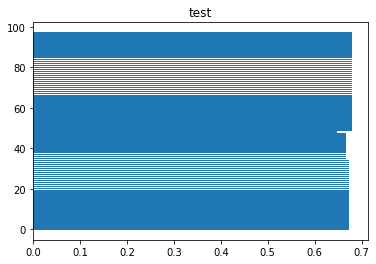

In [108]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import pandas as pd

all_mov = pd.read_csv('alldatafrom2019to1999.csv', sep="|", index_col=None).drop(['id', 'title', 'genres', 'productions_companies', 'original_language', 'overview', 'tagline'], axis=1)
'id', 
x = all_mov.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

print(x)

total = 0
silhou = []
for eps in [0.3,0.5,1,2,3,4,5, 10, 11]:
    for min_samples in range(49,0, -1):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
        labels = db.labels_

        if len(set(db.labels_))>1 and len(set(db.labels_))<3690:
            
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            print (str(eps) + " " + str(min_samples) + ": "+ str(n_clusters_))            
            print("total" + str(total))
            print("Silhouette Coefficient: %0.3f"
                  % metrics.silhouette_score(df, labels, metric='euclidean'))
            silhou.append(metrics.silhouette_score(df, labels, metric='euclidean'))

            total = total + 1
fig, ax = plt.subplots()

ax.barh(range(total), silhou)
            
plt.title('test')
plt.show()


Automatically created module for IPython interactive environment
eps0.3
min_samples49
total0
clusters4
Silhouette Coefficient: 0.392
eps0.3
min_samples48
total1
clusters4
Silhouette Coefficient: 0.404
eps0.3
min_samples47
total2
clusters4
Silhouette Coefficient: 0.412
eps0.3
min_samples46
total3
clusters4
Silhouette Coefficient: 0.421
eps0.3
min_samples45
total4
clusters4
Silhouette Coefficient: 0.458
eps0.3
min_samples44
total5
clusters4
Silhouette Coefficient: 0.465
eps0.3
min_samples43
total6
clusters4
Silhouette Coefficient: 0.473
eps0.3
min_samples42
total7
clusters4
Silhouette Coefficient: 0.479
eps0.3
min_samples41
total8
clusters4
Silhouette Coefficient: 0.480
eps0.3
min_samples40
total9
clusters4
Silhouette Coefficient: 0.494
eps0.3
min_samples39
total10
clusters4
Silhouette Coefficient: 0.502
eps0.3
min_samples38
total11
clusters4
Silhouette Coefficient: 0.508
eps0.3
min_samples37
total12
clusters4
Silhouette Coefficient: 0.514
eps0.3
min_samples36
total13
clusters4
Silhouett

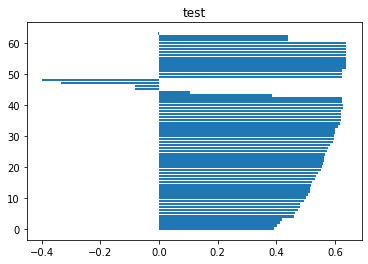

In [109]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
#####################################################
# Plot result
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
total = 0
silhou = []
for eps in [0.3,0.5,1,2,3,4,5, 10, 11]:
    for min_samples in range(49,0, -1):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        if len(set(db.labels_))>1 and len(set(db.labels_))<10:
            print("eps" + str(eps))
            print("min_samples" + str(min_samples))
            print("total" + str(total))
            print("clusters" + str(len(np.unique(labels))))
            print("Silhouette Coefficient: %0.3f"
                  % metrics.silhouette_score(X, labels, metric='euclidean'))
            silhou.append(metrics.silhouette_score(X, labels, metric='euclidean'))

            total = total + 1
fig, ax = plt.subplots()

ax.barh(range(total), silhou)
            
plt.title('test')
plt.show()